In [ ]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

In [ ]:
raw_data = pd.read_csv('../data/raw_analyst_ratings.csv')
stocks_data = pd.read_csv('../data/tock_price_data.csv')

In [ ]:
raw_data = raw_data[raw_data['stock'] == 'AA']
stock_data = stocks_data[stocks_data['stock'] == 'AA']

In [ ]:
raw_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
1433,1835,Shares of several basic material companies are...,https://www.benzinga.com/wiim/20/06/16213027/s...,Benzinga Newsdesk,2020-06-09 10:52:15-04:00,AA
1434,1836,Alcoa Seeing Better July Aluminum Shipments Am...,https://www.benzinga.com/news/20/06/16203021/a...,Benzinga Newsdesk,2020-06-08 11:29:29-04:00,AA
1435,1837,Shares of several basic materials companies ar...,https://www.benzinga.com/wiim/20/06/16202370/s...,Benzinga Newsdesk,2020-06-08 10:32:42-04:00,AA
1436,1838,10 Basic Materials Stocks Moving In Friday's P...,https://www.benzinga.com/pre-market-outlook/20...,Benzinga Insights,2020-06-05 07:40:08-04:00,AA
1437,1839,Shares of several basic materials are trading ...,https://www.benzinga.com/wiim/20/06/16183243/s...,Benzinga Newsdesk,2020-06-04 14:46:13-04:00,AA


In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
2796,2009-08-10,30.950640,31.383181,30.205709,30.494070,27.451963,12441906.0,AA
2797,2009-08-11,30.301830,30.782431,29.845261,30.542130,27.495226,13131169.0,AA
2798,2009-08-12,30.085560,31.551390,29.917351,31.142879,28.036053,14552643.0,AA
2799,2009-08-13,31.983931,33.041248,31.527361,32.945129,29.658504,15589263.0,AA
2800,2009-08-14,33.161400,33.353642,31.503330,31.887810,28.706663,14639409.0,AA


In [ ]:

raw_data['date'] = pd.to_datetime(raw_data['date'] , format='mixed' , utc='True')
stock_data['date'] = pd.to_datetime(stock_data['Date'],format='mixed' , utc='True')

# Merge the two dataframes based on the 'date' column
combined_data = pd.merge(raw_data, stock_data, on='date')

# Print the first few rows of the combined dataframe
combined_data.head()


<ipython-input-42-3f29e8e34995>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['date'] = pd.to_datetime(stock_data['Date'],format='mixed' , utc='True')


,Unnamed: 0,headline,url,publisher,date,stock_x,Date,Open,High,Low,Close,Adj Close,Volume,stock_y
0,1845,"Alcoa CEO, Currently Presenting At BMO Global ...",https://www.benzinga.com/news/20/05/16032673/a...,Benzinga Newsdesk,2020-05-14 00:00:00+00:00,AA,2020-05-14,6.74,7.045,6.380,6.81,6.641704,8896400.0,AA
1,1846,Shares of several basic materials companies ar...,https://www.benzinga.com/20/05/16001463/shares...,Benzinga Newsdesk,2020-05-11 00:00:00+00:00,AA,2020-05-11,7.78,7.910,7.660,7.77,7.577979,8314500.0,AA
2,1847,Shares of several basic materials companies ar...,https://www.benzinga.com/wiim/20/04/15909002/s...,Benzinga Newsdesk,2020-04-29 00:00:00+00:00,AA,2020-04-29,8.15,8.895,8.150,8.67,8.455736,12389200.0,AA
3,1848,54 Stocks Moving In Thursday's Mid-Day Session,https://www.benzinga.com/news/20/04/15867589/5...,Lisa Levin,2020-04-23 00:00:00+00:00,AA,2020-04-23,7.91,8.080,7.235,7.29,7.109841,20737000.0,AA
4,1849,"JP Morgan Maintains Overweight on Alcoa, Lower...",https://www.benzinga.com/news/20/04/15865439/j...,Vick Meyer,2020-04-23 00:00:00+00:00,AA,2020-04-23,7.91,8.080,7.235,7.29,7.109841,20737000.0,AA


In [ ]:

analyzer = SentimentIntensityAnalyzer()

# Create a new column for sentiment scores
combined_data['sentiment_score'] = combined_data['headline'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Print the first few rows of the combined dataframe with sentiment scores
combined_data.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,headline,url,publisher,date,stock_x,Date,Open,High,Low,Close,Adj Close,Volume,stock_y,sentiment_score
0,1845,"Alcoa CEO, Currently Presenting At BMO Global ...",https://www.benzinga.com/news/20/05/16032673/a...,Benzinga Newsdesk,2020-05-14 00:00:00+00:00,AA,2020-05-14,6.74,7.045,6.380,6.81,6.641704,8896400.0,AA,0.0790
1,1846,Shares of several basic materials companies ar...,https://www.benzinga.com/20/05/16001463/shares...,Benzinga Newsdesk,2020-05-11 00:00:00+00:00,AA,2020-05-11,7.78,7.910,7.660,7.77,7.577979,8314500.0,AA,-0.4215
2,1847,Shares of several basic materials companies ar...,https://www.benzinga.com/wiim/20/04/15909002/s...,Benzinga Newsdesk,2020-04-29 00:00:00+00:00,AA,2020-04-29,8.15,8.895,8.150,8.67,8.455736,12389200.0,AA,0.8625
3,1848,54 Stocks Moving In Thursday's Mid-Day Session,https://www.benzinga.com/news/20/04/15867589/5...,Lisa Levin,2020-04-23 00:00:00+00:00,AA,2020-04-23,7.91,8.080,7.235,7.29,7.109841,20737000.0,AA,0.0000
4,1849,"JP Morgan Maintains Overweight on Alcoa, Lower...",https://www.benzinga.com/news/20/04/15865439/j...,Vick Meyer,2020-04-23 00:00:00+00:00,AA,2020-04-23,7.91,8.080,7.235,7.29,7.109841,20737000.0,AA,-0.1197


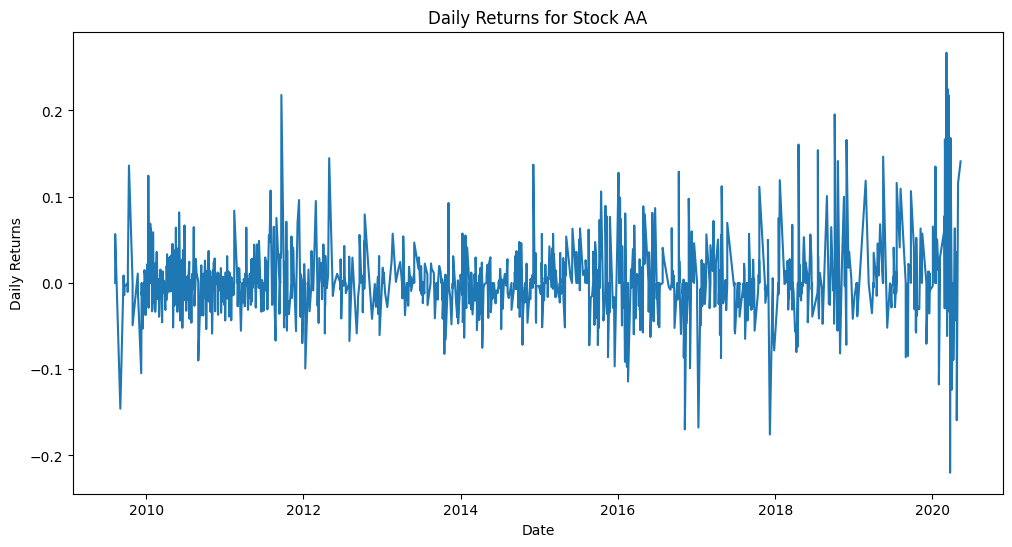

In [ ]:
# Calculate daily stock returns
combined_data['daily_returns'] = (combined_data['Close'] - combined_data['Close'].shift(1)) / combined_data['Close'].shift(1)

# Print the first few rows of the combined dataframe with daily returns
combined_data.head()

# Visualize the daily returns
plt.figure(figsize=(12, 6))
plt.plot(combined_data['date'], combined_data['daily_returns'])
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns for Stock AA')
plt.show()


Correlation between sentiment score and daily returns: -0.01854150357370646


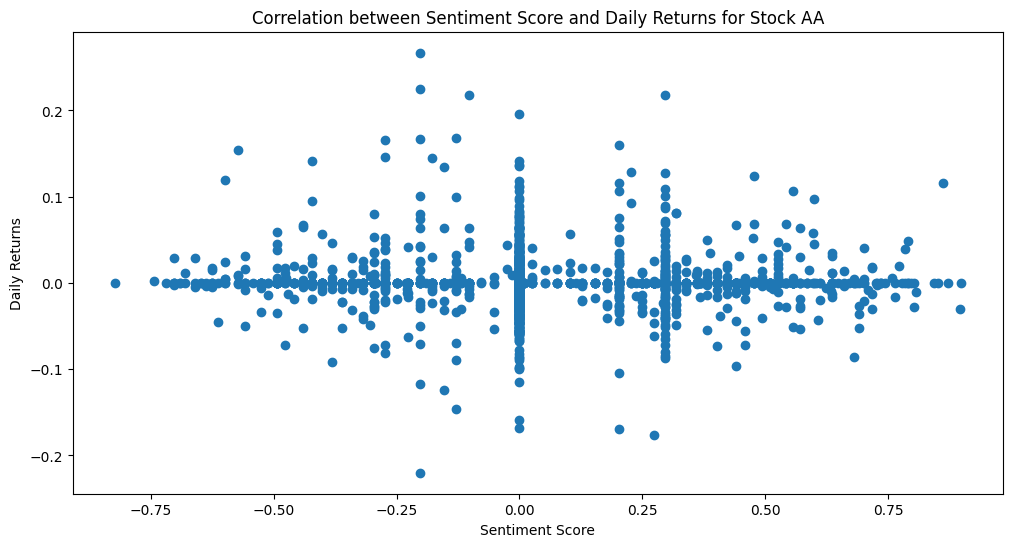

In [ ]:
# Calculate the correlation coefficient between sentiment scores and daily returns
correlation = combined_data['sentiment_score'].corr(combined_data['daily_returns'])

# Print the correlation coefficient
print(f"Correlation between sentiment score and daily returns: {correlation}")

# Visualize the correlation using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(combined_data['sentiment_score'], combined_data['daily_returns'])
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Returns')
plt.title('Correlation between Sentiment Score and Daily Returns for Stock AA')
plt.show()


Spearman correlation coefficient: -0.0125
p-value: 0.5196
Model coefficients: [-0.00203573]
R-squared: 0.0003


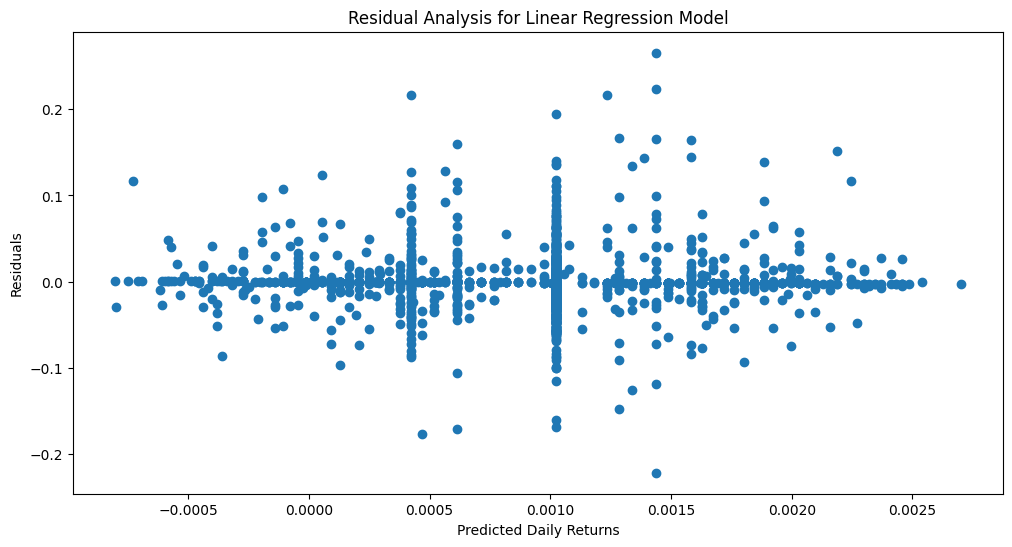

In [ ]:

#Drop rows with missing values
combined_data.dropna(subset=['daily_returns'], inplace=True)

# Calculate the Spearman correlation coefficient between sentiment scores and daily returns
correlation, pvalue = scipy.stats.spearmanr(combined_data['sentiment_score'], combined_data['daily_returns'])

# Print the correlation coefficient and p-value
print(f"Spearman correlation coefficient: {correlation:.4f}")
print(f"p-value: {pvalue:.4f}")

# Perform a linear regression to predict daily returns using sentiment scores
X = combined_data['sentiment_score'].values.reshape(-1, 1)
y = combined_data['daily_returns'].values

model = LinearRegression()
model.fit(X, y)

# Print the model coefficients and R-squared value
print(f"Model coefficients: {model.coef_}")
print(f"R-squared: {model.score(X, y):.4f}")

# Perform a residual analysis to check the assumptions of the linear regression model
residuals = y - model.predict(X)

plt.figure(figsize=(12, 6))
plt.scatter(model.predict(X), residuals)
plt.xlabel('Predicted Daily Returns')
plt.ylabel('Residuals')
plt.title('Residual Analysis for Linear Regression Model')
plt.show()


In [ ]:
# Aggregate Sentiments

combined_data = combined_data.groupby('date')['sentiment_score'].mean().reset_index()

combined_data.describe()

,sentiment_score
count,989.000000
mean,0.044105
std,0.224915
min,-0.743000
25%,0.000000
50%,0.000000
75%,0.159100
max,0.895700


In [ ]:
combined_data.head()

,date,sentiment_score
0,2009-08-10 00:00:00+00:00,0.03845
1,2009-09-03 00:00:00+00:00,-0.12800
2,2009-09-18 00:00:00+00:00,-0.30340
3,2009-09-21 00:00:00+00:00,0.20230
4,2009-09-23 00:00:00+00:00,0.42150
